# Correlation
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Seyed Mani Hosseini

*SID:* 810102552

The objective of this notebook is to understand the concept of correlation.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Calculate Correlation
complete `correlation` function that calculate the correlation matrix of a data fram.

**Note:** you are not allowed to use `pandas.core.frame.DataFrame.corr()` method

In [2]:
def correlation(data: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the correlation matrix from a given dataset.

    Args:
        data (pandas.core.frame.DataFrame): The dataset, where each row represents an observation and each column represents a feature.

    Returns:
        correlation_matrix (pandas.core.frame.DataFrame): The correlation matrix.
    """
    ######################  TODO  #######################


    data = data.select_dtypes(include=[np.number])
    num_columns = len(data.columns)
    corr_matrix = np.zeros((num_columns, num_columns))


    for i in range(num_columns):
        for j in range(num_columns):
            
            i_col = data.iloc[:, i]
            j_col = data.iloc[:, j]

            var_X = np.var(i_col)
            var_Y = np.var(j_col)

            E_X = np.mean(i_col)
            E_Y = np.mean(j_col)
            E_XY = np.mean(i_col * j_col)


            corr = (E_XY - E_X * E_Y) / np.sqrt(var_X * var_Y)
            corr_matrix[i, j] = corr
    return corr_matrix
            

    ######################  TODO  ########################

In [3]:
######################  TODO  ########################
######################  TODO  ########################

### Convert to Datetime and Extract Features

In [4]:
######################  TODO  ########################

data_frame = pd.read_csv('data/energy.csv')

data_frame['Datetime'] = pd.to_datetime(data_frame['Datetime'])
data_frame['Year'] = data_frame['Datetime'].dt.year
data_frame['Month'] = data_frame['Datetime'].dt.month
data_frame['Hour'] = data_frame['Datetime'].dt.hour
######################  TODO  ########################

### Plot Energy Usage Over Years
the graph shows years like 2012 and 2007 might have a larger variance and 2004 and 2017 have smaller variances

<Axes: title={'center': 'AEP_MW'}, xlabel='Year'>

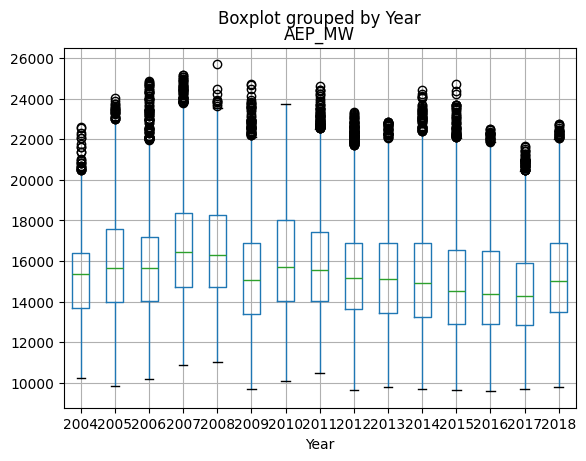

In [5]:
######################  TODO  ########################
data_frame.boxplot(by ='Year', column =['AEP_MW'])
######################  TODO  ########################

### Analyze Energy Usage Over Years
2005 has a bigger box which indicates 50% of data is in a larger range this could mean 2005 has a larger variance (the code below shows that indeed 2005 has a larger variance) 

In [6]:
######################  TODO  ########################
elec_2004 = []
elec_2005 = []

for i in range(len(data_frame["Year"])):
    if data_frame["Year"][i] == 2004:
        elec_2004.append(data_frame["AEP_MW"][i])
    elif data_frame["Year"][i] == 2005:
        elec_2005.append(data_frame["AEP_MW"][i])

var_2004 = np.var(elec_2004) 
var_2005 = np.var(elec_2005)
print(f'2005 variance {var_2005}') 
print(f'2004 variance {var_2004}') 

######################  TODO  ########################

2005 variance 6608761.862442252
2004 variance 4310599.722768778


### Plot Energy Usage Over Hours
this is shows energy usage increases in the evening when more people are at their homes, also the outliers at those hours are less than outliers in the morning.

<Axes: title={'center': 'AEP_MW'}, xlabel='Hour'>

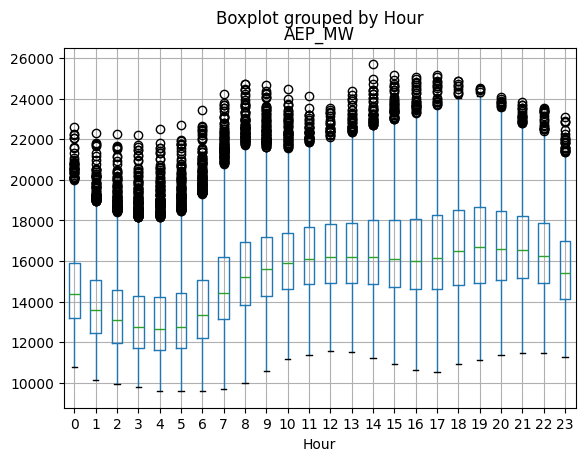

In [7]:
######################  TODO  ########################
data_frame.boxplot(by ='Hour', column =['AEP_MW'])
######################  TODO  ########################

### Plot Energy Usage Over Months
boxplot shows that in june and july variance could be higher also generaly energy use is higher in winter.

<Axes: title={'center': 'AEP_MW'}, xlabel='Month'>

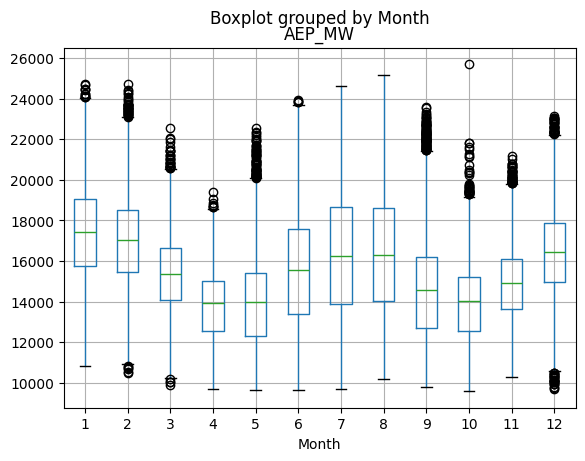

In [8]:
######################  TODO  ########################
data_frame.boxplot(by ='Month', column =['AEP_MW'])
######################  TODO  ########################

### Calculate Correlation Between Specific Hours and Energy Usage

In [9]:
######################  TODO  ########################
filtered_data_frame= data_frame[data_frame["Hour"].between(4,13)]
correlations = correlation(filtered_data_frame)
print(f'Correlation of energy and time between 4 am and 7 pm: {correlations[3][0]}')

######################  TODO  ########################
filter_Spring = data_frame[data_frame["Month"].between(2,4)]
spring_matrix=correlation(filter_Spring)
print("Correlation of February,March, and April with energy usage : ",  spring_matrix[0,2])

filter_winter= data_frame[data_frame["Month"].between(10,12)]
winter_matrix = correlation(filter_winter)
print("Correlation of October, November and December with energy usage : ",  winter_matrix[0,2])


Correlation of energy and time between 4 am and 7 pm: 0.47137891043962543
Correlation of February,March, and April with energy usage :  -0.5582445746166724
Correlation of October, November and December with energy usage :  0.4738379625643042


### Analyze Correlation Between Specific Hours and Energy Usage

1- a positive correlation is found between hours and energy use , previous boxplot also confirms this fact since in the boxplot boxes in that range are increasing together indicating a positive correlation\
2- from feb to april energy usage is getting lower so corr should be negative and it is , and from oct to dec it boxes are moving up which means they have a positive correlation

## Causal Effect
this shows and numbers of tvs is not gooing to affect the life expectancy much but on the other hand number of doctors is very important and closely related to life expectancy

In [10]:
######################  TODO  ########################
data_frame = pd.read_csv('data/TV_LE_Physician.csv')
correlation_Phys = data_frame["Life Expectancy (years)"].corr(data_frame["Physicians per 1000 people"])
correlation_TV = data_frame["Life Expectancy (years)"].corr(data_frame["Televisions per 1000 people"])
print(correlation_Phys)
print(correlation_TV)
######################  TODO  ########################

0.628804936692965
0.025874817477201013
